In [4]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:

iris = pd.read_csv("E:\Datasets for ML\Iris Dataset\Iris Classification\iris.txt",names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm','Species'],engine='python')

In [8]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


# EDA

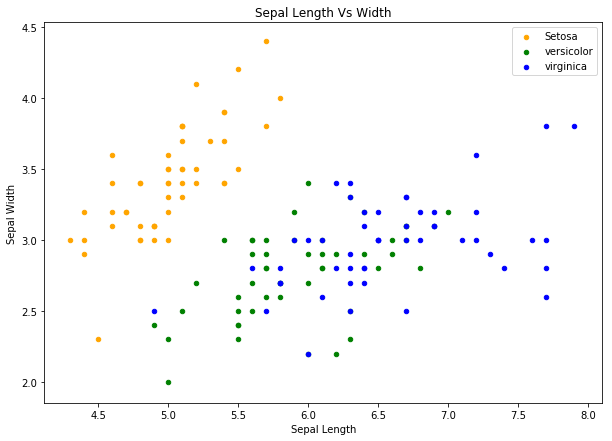

In [15]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind = 'scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.legend()
plt.show()

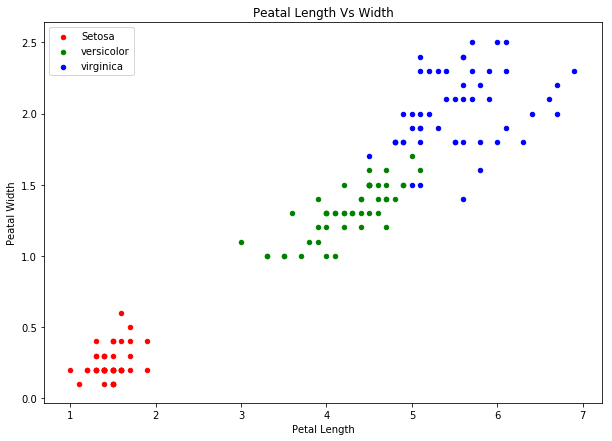

In [16]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind = 'scatter', x='PetalLengthCm', y='PetalWidthCm', color='red', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Peatal Width')
fig.set_title('Peatal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

C:\ProgramData\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


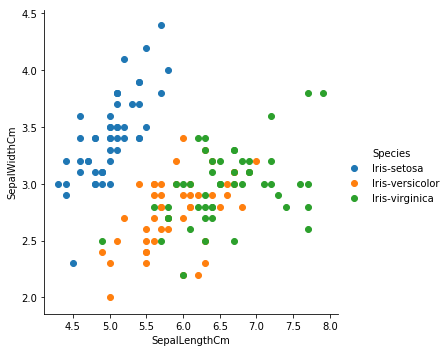

In [17]:
sns.FacetGrid(iris, hue='Species', size=5)\
   .map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm')\
   .add_legend()

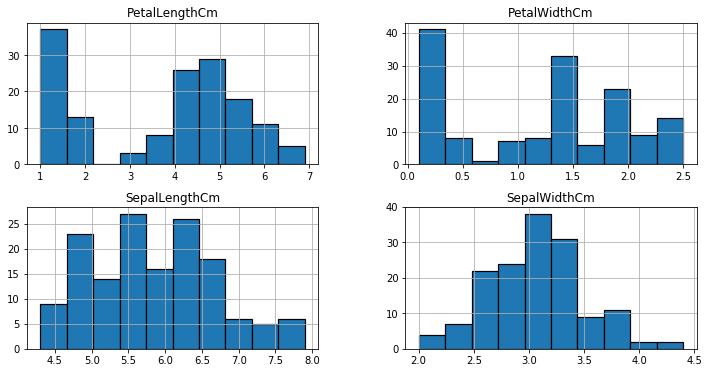

In [18]:
iris.hist(edgecolor = 'black', linewidth = '1.2')
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

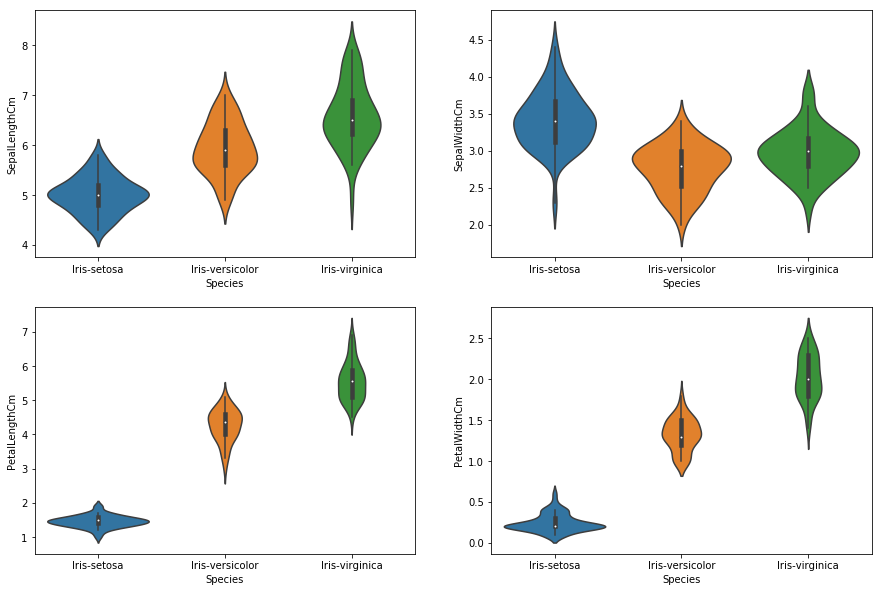

In [20]:
plt.figure(figsize = (15, 10))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLengthCm', data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidthCm', data=iris)

plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidthCm', data=iris)

# Classification:

## Here we are going to do __IrisClassification__ on different models. Before we start we need to know some of the  basic ML.  
###  **Here we have some features of iris i.e., Sepal and Petal and some target variables that are three flower species**

In [22]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn  import metrics 
from sklearn.tree import DecisionTreeClassifier

In [24]:
iris.shape


(150, 5)

**we created heatmap so that we can communicate between data values that would be much harder to understand if presented numerically**

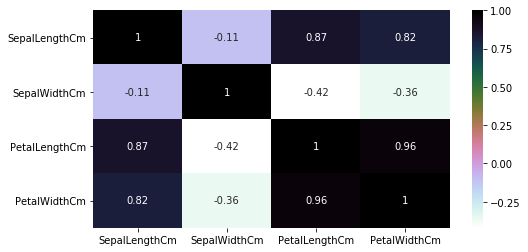

In [25]:
plt.figure(figsize=(8,4))
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r')
plt.show()

## __Train test Split__

In [26]:
train, test = train_test_split(iris, train_size = 0.7)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


C:\ProgramData\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [27]:
train_X = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
train_y = train.Species
test_X = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
test_y = train.Species

In [29]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
103,6.3,2.9,5.6,1.8
8,4.4,2.9,1.4,0.2
63,6.1,2.9,4.7,1.4
120,6.9,3.2,5.7,2.3
149,5.9,3.0,5.1,1.8


In [31]:
train_y.head()

103     Iris-virginica
8          Iris-setosa
63     Iris-versicolor
120     Iris-virginica
149     Iris-virginica
Name: Species, dtype: object

## Support Vector Machine

In [34]:
model = svm.SVC()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print("The Accuracy of SVM is", metrics.accuracy_score(prediction, test_y))

The Accuracy of SVM is 0.9809523809523809


C:\ProgramData\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


As we can see accuracy is quite good in SVM.

## Logistic Regression

In [38]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print("the accuracy of logisticRegression model is", metrics.accuracy_score(prediction, test_y))

the accuracy of logisticRegression model is 0.9428571428571428


C:\ProgramData\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


**If we compare LogisticRegression with SVM, accuracy is little less. Similarly,we can check with the other methods. So that we can have better view on data**

## K Nearest Neighbors


In [37]:
model = KNeighborsClassifier(n_neighbors = 6)
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print("The Accuracy of KNN is", metrics.accuracy_score(prediction, test_y))

The Accuracy of KNN is 0.9714285714285714



#### __To know more we are going to see accuracy over different values of KNN__

## DecisionTreeClassifier



In [40]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
predition = model.predict(test_X)
print("The Accuracy of Decison tree is", metrics.accuracy_score(prediction, test_y))

The Accuracy of Decison tree is 0.9428571428571428


([<matplotlib.axis.XTick at 0x1d8745ca160>,
 <a list of 10 Text xticklabel objects>)

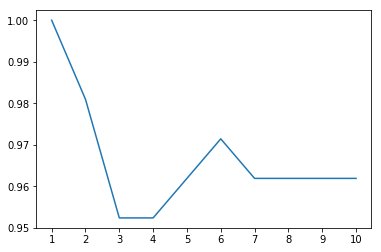

In [41]:
a_index = list(range(1, 11))
a = pd.Series()
for i in list(range(1, 11)):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_y)))
plt.plot(a_index, a)
x = [1,2,3,4,5,6,7,8,9,10]
plt.xticks(x)


# Observation:
1. If we collectively see accuracy of iris data, they were quite close to each other.
2. When we seperatly find out the accuracy, we observe that petal accuracy is higher than sepals.
3. The relationship between Sepal width and length is very low where as petal width and length is very high.